In [1]:
#libs
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as nmp 
import math


def draw_plot(func, a, b, c,xx,yy):
    plt.figure(figsize=(8, 4))
    plt.plot(xx, yy, 'go')
    y2 = func(a, b, c, xx)
    plt.plot(xx, y2)
    plt.grid()
    plt.show()
    

In [2]:
#functions
def linear(a,b,c,x):
    return a*x+b

def square(a,b,c,x):
    return a*x*x+b*x+c

def expo(a,b,c,x):
    return a*pow(math.exp(1),b*x)

def logarithm(a,b,c,x):
    return (a+b*(math.log(x,math.exp(1))))

def power(a,b,c,x):
    return a*pow(x,b)

def log_draw(a, b, c,xx):
    res = nmp.array([])
    for i in xx:
         res = nmp.append(res, a + b * math.log(i, math.exp(1)))
    return res

In [3]:
#a,b,c calculating
def linear_deviation(x_pack,y_pack):
    Sx = 0
    Sxx = 0
    Sxy = 0
    Sy = 0
    n = (len(x_pack))
    for x in range(0,n):
        Sx += x_pack[x]  
        Sy += y_pack[x]
        Sxx += (x_pack[x]*x_pack[x])
        Sxy += (x_pack[x]*y_pack[x])
    koef_a = (Sxy*n-Sx*Sy)/(Sxx*n-Sx*Sx)
    koef_b = (Sxx*Sy-Sx*Sxy)/(Sxx*n-Sx*Sx)
    return [koef_a,koef_b]

#########################

def quadro_deviation(x_pack,y_pack):
    matr_sums = nmp.array([[len(x_pack), nmp.sum(x_pack), nmp.sum(pow(x_pack,2))],
                           [nmp.sum(x_pack), nmp.sum(pow(x_pack,2)), nmp.sum(pow(x_pack,3))], 
                           [nmp.sum(pow(x_pack,2)), nmp.sum(pow(x_pack,3)), nmp.sum(pow(x_pack,4))]])
    matr_res = nmp.array([nmp.sum(y_pack), nmp.sum(y_pack*x_pack), nmp.sum(y_pack*pow(x_pack,2))])
    return nmp.linalg.solve(matr_sums, matr_res)

##########################

def exponenta_deviation(x_pack,y_pack): 
    lnY = nmp.array([])
    for y in y_pack:
        lnY = nmp.append(lnY, [math.log(y, math.exp(1))])
    koef_b, koef_a = linear_deviation(x_pack, lnY)
    koef_a = math.exp(koef_a)
    return [koef_a,koef_b]

#########################

def logariphmic_deviation(x_pack,y_pack):
    lnX = nmp.array([])
    for x in x_pack:
        lnX = nmp.append(lnX, [math.log(x, math.exp(1))])
    koef_b, koef_a = linear_deviation(lnX, y_pack)
    return [koef_a, koef_b]
    
#########################

def power_deviation(x_pack,y_pack):
    lnY = nmp.array([])
    lnX = nmp.array([])
    for i in y_pack:
        lnY = nmp.append(lnY, [math.log(i, math.exp(1))])
    for i in x_pack:
        lnX = nmp.append(lnX, [math.log(i, math.exp(1))])
    koef_b, koef_a = linear_deviation(lnX, lnY)
    koef_a = nmp.exp(koef_a)
    return [koef_a,koef_b]

In [4]:
#deviation value + average square deviation
def dev_value(x_pack,y_pack,a,b,c,func):
    n = len(x_pack)
    devsum = 0
    for i in range(0,n):
        devsum += pow(func(a,b,c,x_pack[i])-y_pack[i],2)
    return devsum

def ave_square_dev(x_pack,y_pack,a,b,c,func):
    n = len(x_pack)
    return math.sqrt(dev_value(x_pack,y_pack,a,b,c,func)/n)

Сохранять в файл (1-да, иначе - нет)
1
---------------------------------------
Результаты:
---------------------------------------
1)Линейная функция: f(x) =5.010769230769224x+(-2.3696263736263377)
Мера отклонения: 0.487461098901099
Среднеквадратичное отклонение: 0.18659756140289474


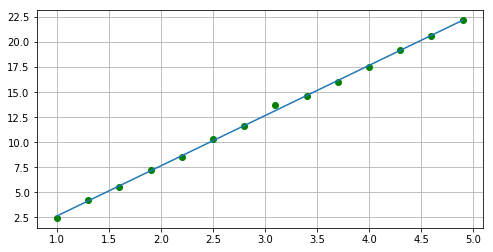

---------------------------------------
2)Квадратичная функция: f(x) =-0.04403235653230181*x^2+(5.270560134309804)*x+(-2.6884206349202113)
Мера отклонения: 0.4417290934065926
Среднеквадратичное отклонение: 0.17762904633102916


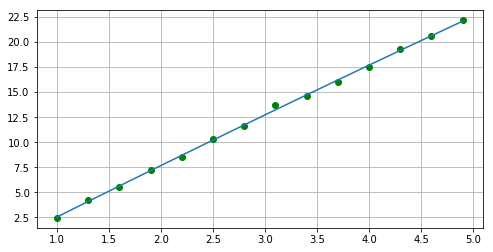

---------------------------------------
3)Экспоненциальная функция: f(x) =2.4368920671504886*e^((0.49653891927524796)*x)
Мера отклонения: 64.41741804013066
Среднеквадратичное отклонение: 2.145051082311006


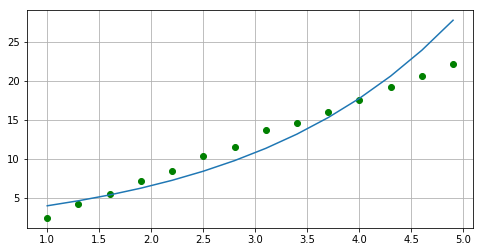

---------------------------------------
4)Степенная функция: f(x) =2.8868672707305807*x^(1.3205929437640473)
Мера отклонения: 5.540212359065647
Среднеквадратичное отклонение: 0.6290703094400297


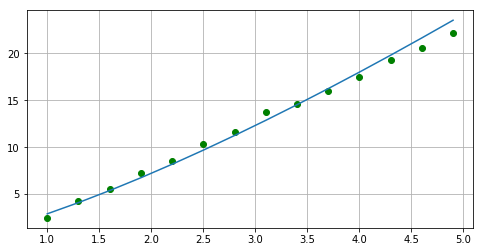

---------------------------------------
5)Логарифмическая функция: f(x) =0.1331641587663667+(12.518346887341206)*ln(x)
Мера отклонения: 21.456286143893646
Среднеквадратичное отклонение: 1.2379789446597929


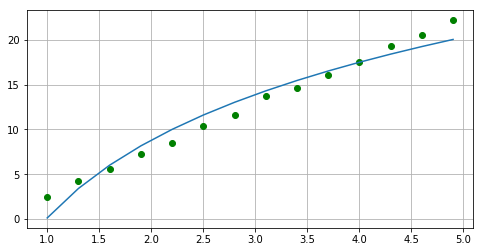

---------------------------------------
---------------------------------------
---------------------------------------
Наиболее эффективной оказывается функция:


In [33]:
# main
f = open('Lab2In.txt','r')
f2 = open('Lab2Out.txt','w')
x_es = str(f.readline())
y_es = str(f.readline())
f.close()
if_save = False
x_arr = x_es.split()
y_arr = y_es.split()
x_a=nmp.asarray(list(map(float,x_arr)))
y_a=nmp.asarray(list(map(float,y_arr)))

lin = nmp.array([])
sq = nmp.array([])
ex = nmp.array([])
powr = nmp.array([])
logtm = nmp.array([])

print('Сохранять в файл (1-да, иначе - нет)')
inp = str(input())
if (inp is '1'):
    if_save = True
    
print('---------------------------------------')
    
print('Результаты:')

print('---------------------------------------')
ka,kb = linear_deviation(x_a,y_a)
print('1)Линейная функция: f(x) =' + str(ka) +'x+('+ str(kb) + ')')
print('Мера отклонения: ' + str(dev_value(x_a,y_a,ka,kb,0,linear)))
print('Среднеквадратичное отклонение: '+ str(ave_square_dev(x_a,y_a,ka,kb,0,linear)))
draw_plot(linear, ka, kb, 0, x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,0,linear)
k_avd = ave_square_dev(x_a,y_a,ka,kb,0,linear)
lin = nmp.append(lin,['Линейная:   |'])
for i in x_a:
    lin = nmp.append(lin,[linear(ka,kb,0,i)])
lin = nmp.append(lin,[k_s,k_avd,ka,kb,0])

print('---------------------------------------')
kc,kb,ka = quadro_deviation(x_a,y_a)
print('2)Квадратичная функция: f(x) =' + str(ka) + '*x^2+(' + str(kb) + ')*x+(' + str(kc) + ')')
print('Мера отклонения: ' + str(dev_value(x_a,y_a,ka,kb,kc,square)))
print('Среднеквадратичное отклонение: '+ str(ave_square_dev(x_a,y_a,ka,kb,kc,square)))
draw_plot(square, ka, kb, kc,x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,kc,square)
k_avd = ave_square_dev(x_a,y_a,ka,kb,kc,square)
sq = nmp.append(sq,['Квадратичная:|'])
for i in x_a:
    sq = nmp.append(sq,[square(ka,kb,kc,i)])
sq = nmp.append(sq,[k_s,k_avd,ka,kb,kc])
                          
print('---------------------------------------')
ka,kb = exponenta_deviation(x_a,y_a)
print('3)Экспоненциальная функция: f(x) =' + str(ka) +'*e^(('+ str(kb) + ')*x)')
print('Мера отклонения: ' + str(dev_value(x_a,y_a,ka,kb,0,expo)))
print('Среднеквадратичное отклонение: '+ str(ave_square_dev(x_a,y_a,ka,kb,0,expo)))
draw_plot(expo, ka, kb, 0,x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,0,expo)
k_avd = ave_square_dev(x_a,y_a,ka,kb,0,expo)
ex = nmp.append(ex,['Экспоненциальная:|'])
for i in x_a:
    ex = nmp.append(ex,[expo(ka,kb,0,i)])
ex = nmp.append(ex,[k_s,k_avd,ka,kb,0])
                          
print('---------------------------------------')
ka,kb = power_deviation(x_a,y_a)
print('4)Степенная функция: f(x) =' + str(ka) + '*x^(' + str(kb) +')')
print('Мера отклонения: ' + str(dev_value(x_a,y_a,ka,kb,0,power)))
print('Среднеквадратичное отклонение: '+ str(ave_square_dev(x_a,y_a,ka,kb,0,power)))
draw_plot(power, ka, kb, 0,x_a,y_a)
k_s = dev_value(x_a,y_a,ka,kb,0,power)
k_avd = ave_square_dev(x_a,y_a,ka,kb,0,power)
powr = nmp.append(powr,['Степенная:  |'])
for i in x_a:
    powr = nmp.append(powr,[power(ka,kb,0,i)])
powr = nmp.append(powr,[k_s,k_avd,ka,kb,0])

print('---------------------------------------')
ka,kb = logariphmic_deviation(x_a,y_a)
print('5)Логарифмическая функция: f(x) =' + str(ka) + '+(' + str(kb) +')*ln(x)')
print('Мера отклонения: ' + str(dev_value(x_a,y_a,ka,kb,0,logarithm)))
print('Среднеквадратичное отклонение: '+ str(ave_square_dev(x_a,y_a,ka,kb,0,logarithm)))
draw_plot(log_draw, ka, kb, 0, x_a, y_a)
k_s = dev_value(x_a,y_a,ka,kb,0,logarithm)
k_avd = ave_square_dev(x_a,y_a,ka,kb,0,logarithm)
logtm = nmp.append(logtm,['Логарифмическая:  |'])
for i in x_a:
    logtm = nmp.append(logtm,[logarithm(ka,kb,0,i)])
logtm = nmp.append(logtm,[k_s,k_avd,ka,kb,0])

row = nmp.array([])
if (if_save):
   # f2.write((str(list(lin))))
    for i in range(0,len(lin)):
        row = nmp.append(row,[list(lin)[i]])
        row = nmp.append(row,[list(sq)[i]])
        row = nmp.append(row,[list(ex)[i]])
        row = nmp.append(row,[list(powr)[i]])
        row = nmp.append(row,[list(logtm)[i]])
        f2.write((str(list(row))) + '\n')
        row = nmp.array([])
    f2.close()     

print('---------------------------------------')
print('---------------------------------------')
print('---------------------------------------')
print('Наиболее эффективной оказывается функция:')